In [2]:
import numpy as np

In [3]:
import scipy as sp

In [4]:
import matplotlib as mp

In [5]:
import pandas as pd

In [63]:
data = np.genfromtxt('abalone.csv', delimiter = ',',dtype = 'unicode')

In [66]:
np.random.shuffle(data)

In [226]:
cut_data = np.array(data[:1000,:],copy =True)

In [97]:
new_data = np.zeros((data.shape[0],11))
for i in range(data.shape[0]):
    if data[i][0] == 'M':
        new_data[i][0] = 1
        new_data[i][1] = 0
        new_data[i][2] = 0
        new_data[i,3:] = data[i,1:]
    if data[i][0] == 'F':
        new_data[i][0] = 0
        new_data[i][1] = 1
        new_data[i][2] = 0
        new_data[i,3:] = data[i,1:]
    if data[i][0] == 'I':
        new_data[i][0] = 0
        new_data[i][1] = 0
        new_data[i][2] = 1
        new_data[i,3:] = data[i,1:]

In [98]:
new_cut_data = np.zeros((cut_data.shape[0],11))
for i in range(cut_data.shape[0]):
    if cut_data[i][0] == 'M':
        new_cut_data[i][0] = 1
        new_cut_data[i][1] = 0
        new_cut_data[i][2] = 0
        new_cut_data[i,3:] = cut_data[i,1:]
    if cut_data[i][0] == 'F':
        new_cut_data[i][0] = 0
        new_cut_data[i][1] = 1
        new_cut_data[i][2] = 0
        new_cut_data[i,3:] = cut_data[i,1:]
    if cut_data[i][0] == 'I':
        new_cut_data[i][0] = 0
        new_cut_data[i][1] = 0
        new_cut_data[i][2] = 1
        new_cut_data[i,3:] = cut_data[i,1:]

In [99]:
y = np.array(new_data[:,10], copy = True)
y_cut = np.array(new_cut_data[:,10], copy = True)

In [100]:
raw = np.array(new_data[:,:10], copy = True)
raw_cut = np.array(new_cut_data[:,:10], copy =True)

In [101]:
cooked = (raw - np.mean(raw, axis = 0))/np.std(raw, axis = 0)
cooked_cut = (raw_cut - np.mean(raw_cut, axis = 0))/np.std(raw_cut, axis = 0)

In [102]:
dist = [np.linalg.norm(cooked[np.random.randint(cooked.shape[0], size = 1),:] - cooked[np.random.randint(cooked.shape[0], size = 1),:]) for i in range(1000) ]

In [103]:
dist = np.sort(dist)
quantile = np.array(dist[[50,100,500,900,950]], copy=True)

In [222]:
dist2 = [np.linalg.norm(raw[np.random.randint(raw.shape[0], size = 1),:] - raw[np.random.randint(raw.shape[0], size = 1),:]) for i in range(1000) ]
dist2 = np.sort(dist2)
quantile2 = np.array(dist2[[50,100,500,900,950]], copy = True)

In [113]:
def gaussian_RBF(x_1, x_2, _lambda):
    return np.exp(-np.dot(x_1 - x_2, x_1 - x_2)/_lambda**2)

In [106]:
def train_gp(x_data,_lambda, _sigma):
    size = x_data.shape[0]
    C = _sigma**2*np.eye(size)
    K = [ [gaussian_RBF(x_data[i],x_data[j],_lambda) for i in range(size)] for j in range(size)]
    C = C + K
    return C

In [107]:
def predict_mean(x_data, x_test, C, y_data, _lambda):
    test_size = x_test.shape[0]
    data_size = x_data.shape[0]
    inv = np.linalg.inv(C)
    factor = np.dot(inv, y_data)
    prediction = [np.dot([gaussian_RBF(x_test[i], x_data[j], _lambda) for j in range(data_size)],factor) for i in range(test_size)]
    return prediction

In [132]:
def err(y, pred_y):
    return 0.5*np.dot(y - pred_y, y - pred_y)

In [135]:
def five_fold_CV(x, y, _lambda, _sigma):
    size_lambda = _lambda.shape[0]
    size_sigma = _sigma.shape[0]
    size = x.shape[0]
    step = int(size/5)
    ls = np.zeros((size_lambda, size_sigma, 5))
    train_loss = np.zeros((size_lambda, size_sigma, 5))
    for i in range(5):
        x_test = x[[step*i + j for j in range(step)],:]
        y_test = y[[step*i + j for j in range(step)]]
        x_train = x[[j for j in range(step*i)]+[j for j in range(step*(i+1), size)],:]
        y_train = y[[j for j in range(step*i)]+[j for j in range(step*(i+1), size)]]
        for j in range(size_lambda):
            for k in range(size_sigma):
                print(j, k, i)
                C = train_gp(x_train, _lambda[j], _sigma[k])
                pred = predict_mean(x_train, x_test, C, y_train, _lambda[j])
                pred_train = predict_mean(x_train, x_train, C, y_train, _lambda[j])
                ls[j,k,i] = err(y_test, pred)
                train_loss[j, k, i] = err(y_train, pred_train)
    return (ls, train_loss)

In [110]:
_sigma = np.array([0.01,0.03,0.1,0.3,1,3])

In [141]:
loss, train_loss = five_fold_CV(cooked_cut, y_cut, quantile, _sigma)
loss2, train_loss2 = five_fold_CV(raw_cut, y_cut, quantile2, _sigma)

0 0 0
0 1 0
0 2 0
0 3 0
0 4 0
0 5 0
1 0 0
1 1 0
1 2 0
1 3 0
1 4 0
1 5 0
2 0 0
2 1 0
2 2 0
2 3 0
2 4 0
2 5 0
3 0 0
3 1 0
3 2 0
3 3 0
3 4 0
3 5 0
4 0 0
4 1 0
4 2 0
4 3 0
4 4 0
4 5 0
0 0 1
0 1 1
0 2 1
0 3 1
0 4 1
0 5 1
1 0 1
1 1 1
1 2 1
1 3 1
1 4 1
1 5 1
2 0 1
2 1 1
2 2 1
2 3 1
2 4 1
2 5 1
3 0 1
3 1 1
3 2 1
3 3 1
3 4 1
3 5 1
4 0 1
4 1 1
4 2 1
4 3 1
4 4 1
4 5 1
0 0 2
0 1 2
0 2 2
0 3 2
0 4 2
0 5 2
1 0 2
1 1 2
1 2 2
1 3 2
1 4 2
1 5 2
2 0 2
2 1 2
2 2 2
2 3 2
2 4 2
2 5 2
3 0 2
3 1 2
3 2 2
3 3 2
3 4 2
3 5 2
4 0 2
4 1 2
4 2 2
4 3 2
4 4 2
4 5 2
0 0 3
0 1 3
0 2 3
0 3 3
0 4 3
0 5 3
1 0 3
1 1 3
1 2 3
1 3 3
1 4 3
1 5 3
2 0 3
2 1 3
2 2 3
2 3 3
2 4 3
2 5 3
3 0 3
3 1 3
3 2 3
3 3 3
3 4 3
3 5 3
4 0 3
4 1 3
4 2 3
4 3 3
4 4 3
4 5 3
0 0 4
0 1 4
0 2 4
0 3 4
0 4 4
0 5 4
1 0 4
1 1 4
1 2 4
1 3 4
1 4 4
1 5 4
2 0 4
2 1 4
2 2 4
2 3 4
2 4 4
2 5 4
3 0 4
3 1 4
3 2 4
3 3 4
3 4 4
3 5 4
4 0 4
4 1 4
4 2 4
4 3 4
4 4 4
4 5 4


In [190]:
loss = loss/100
train_loss = train_loss/400
loss2 = loss2/100
train_loss2 = train_loss2/400

In [155]:
temp_loss = np.array(loss, copy = True)
temp_train = np.array(train_loss, copy = True)
temp_loss2 = np.array(loss2, copy = True)
temp_train2 = np.array(train_loss2, copy = True)

In [191]:
test_avg = np.mean(loss, axis = 2)
train_avg = np.mean(train_loss, axis = 2)
testr_avg = np.mean(loss2, axis = 2)
trainr_avg = np.mean(train_loss2, axis = 2)

In [219]:
test_avg2 = np.mean(temp_loss, axis = 2)
train_avg2 = np.mean(temp_train, axis = 2)
testr_avg2 = np.mean(temp_loss2, axis = 2)
trainr_avg2 = np.mean(temp_train2, axis = 2)

In [195]:
temp_1 = test_avg
temp_2 = train_avg
temp_3 = testr_avg
temp_4 = trainr_avg

In [197]:
np.savetxt("loss_cooked.txt", temp_1.reshape(30), delimiter = ',')
np.savetxt("train_cooked.txt", temp_2.reshape(30), delimiter = ',')
np.savetxt("loss_raw.txt", temp_3.reshape(30), delimiter = ',')
np.savetxt("train_raw.txt", temp_4.reshape(30), delimiter = ',')

In [204]:
from IPython.display import display

In [209]:
p1 = pd.DataFrame(test_avg, columns = _sigma, index = quantile)
p2 = pd.DataFrame(train_avg, columns = _sigma, index = quantile)
p3 = pd.DataFrame(testr_avg, columns = _sigma, index = quantile2)
p4 = pd.DataFrame(trainr_avg, columns = _sigma, index = quantile2)
print("test_cooked")
display(p1)
print("train_cooked")
display(p2)
print("test_raw")
display(p3)
print("train_raw")
display(p4)

test_cooked


,0.01,0.03,0.1,0.3,1.0,3.0
1.085119,0.031669,0.026379,0.019090,0.015965,0.017504,0.033656
1.555447,0.037637,0.022300,0.012876,0.010837,0.012256,0.022099
3.664218,0.014675,0.008627,0.007024,0.006864,0.007611,0.010738
6.903307,0.015868,0.008535,0.006551,0.006563,0.007120,0.009317
8.057710,0.017187,0.008398,0.006546,0.006522,0.007151,0.009197


train_cooked


,0.01,0.03,0.1,0.3,1.0,3.0
1.085119,0.000063,0.000340,0.002103,0.007755,0.030374,0.115476
1.555447,0.000327,0.001589,0.005565,0.011760,0.026866,0.077730
3.664218,0.006933,0.010841,0.015084,0.018799,0.024626,0.039786
6.903307,0.013868,0.016743,0.019361,0.021872,0.026074,0.035948
8.057710,0.015168,0.017717,0.020135,0.022421,0.026608,0.035732


test_raw


,0.01,0.03,0.1,0.3,1.0,3.0
0.137472,0.028335,0.024640,0.021030,0.018700,0.021272,0.046313
0.231811,0.028003,0.019458,0.013643,0.011532,0.013121,0.026878
1.455076,0.009675,0.006771,0.006315,0.006332,0.007469,0.010000
1.906633,0.008032,0.006435,0.006307,0.006285,0.007643,0.009570
2.037235,0.007674,0.006406,0.006306,0.006285,0.007701,0.009507


train_raw


,0.01,0.03,0.1,0.3,1.0,3.0
0.137472,0.000010,0.000061,0.000310,0.001440,0.008268,0.039562
0.231811,0.000096,0.000392,0.001360,0.002868,0.006865,0.023646
1.455076,0.003783,0.004345,0.004887,0.005498,0.006954,0.009590
1.906633,0.004187,0.004644,0.005178,0.005680,0.007264,0.009293
2.037235,0.004272,0.004711,0.005245,0.005723,0.007348,0.009255


In [221]:
np1 = pd.DataFrame(test_avg2, columns = _sigma, index = quantile)
np2 = pd.DataFrame(train_avg2, columns = _sigma, index = quantile)
np3 = pd.DataFrame(testr_avg2, columns = _sigma, index = quantile2)
np4 = pd.DataFrame(trainr_avg2, columns = _sigma, index = quantile2)
print("test_cooked")
display(np1)
print("train_cooked")
display(np2)
print("test_raw")
display(np3)
print("train_raw")
display(np4)

test_cooked


,0.01,0.03,0.1,0.3,1.0,3.0
1.085119,1266.769112,1055.142877,763.603643,638.614532,700.162738,1346.251618
1.555447,1505.467461,892.019349,515.032206,433.486357,490.253239,883.953463
3.664218,587.003868,345.081765,280.947702,274.550093,304.426652,429.519184
6.903307,634.718733,341.418518,262.027537,262.511806,284.812564,372.697863
8.057710,687.493928,335.933377,261.847948,260.866121,286.041803,367.895548


train_cooked


,0.01,0.03,0.1,0.3,1.0,3.0
1.085119,2.525599,13.600873,84.130979,310.191299,1214.953877,4619.025644
1.555447,13.089870,63.549900,222.583576,470.398572,1074.634716,3109.196513
3.664218,277.330009,433.659995,603.348157,751.944132,985.037896,1591.442529
6.903307,554.737098,669.726787,774.457088,874.875741,1042.949056,1437.901798
8.057710,606.702079,708.680893,805.402003,896.842163,1064.305850,1429.264266


test_raw


,0.01,0.03,0.1,0.3,1.0,3.0
0.137472,1133.412682,985.584995,841.185985,748.018174,850.867354,1852.521532
0.231811,1120.124465,778.332461,545.718474,461.265859,524.829865,1075.132552
1.455076,387.018465,270.831981,252.619661,253.261419,298.745266,399.998490
1.906633,321.274335,257.389964,252.281810,251.404650,305.735414,382.814250
2.037235,306.965374,256.234420,252.257672,251.389356,308.053695,380.290471


train_raw


,0.01,0.03,0.1,0.3,1.0,3.0
0.137472,1.631658,9.700441,49.661751,230.326191,1322.834743,6329.890315
0.231811,15.352526,62.733501,217.521237,458.833430,1098.438530,3783.413917
1.455076,605.227991,695.139083,781.900032,879.688609,1112.703039,1534.413847
1.906633,669.865830,743.035281,828.425741,908.820348,1162.183527,1486.832280
2.037235,683.445454,753.784312,839.131534,915.642666,1175.633036,1480.742444


In [206]:
import matplotlib.pyplot as plt

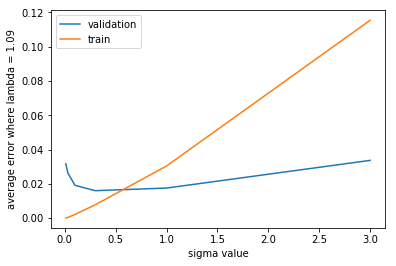

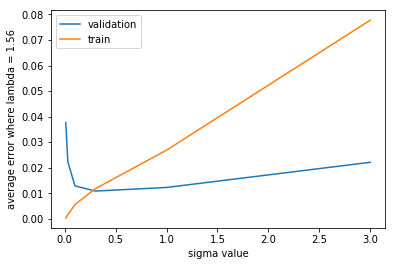

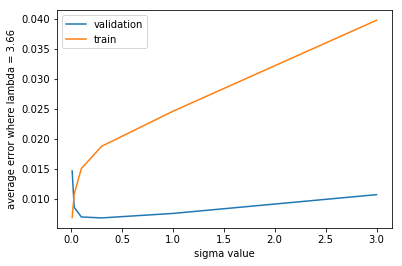

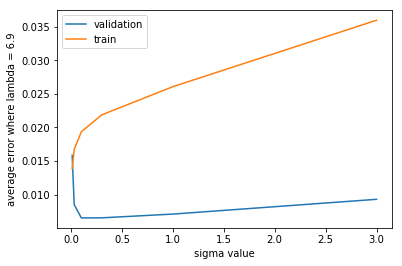

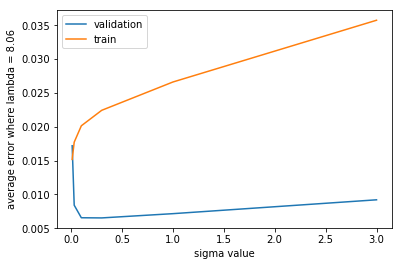

In [193]:
for i in range(5):
    line_1, = plt.plot(_sigma,test_avg[i,:],label = 'validation')
    line_2, = plt.plot(_sigma,train_avg[i,:],label = 'train')
    plt.legend(handles = [line_1, line_2])
    plt.ylabel("average error where lambda = "+str(round(quantile[i], 2)))
    plt.xlabel("sigma value")
    plt.show()

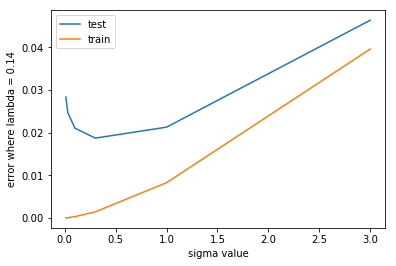

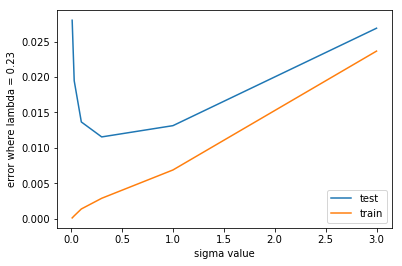

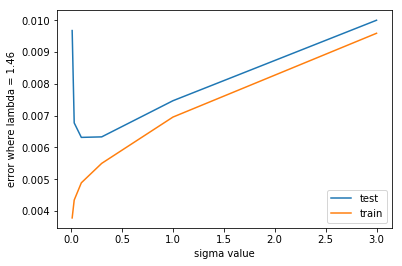

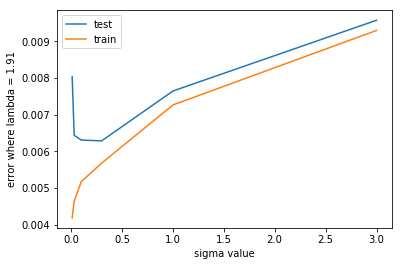

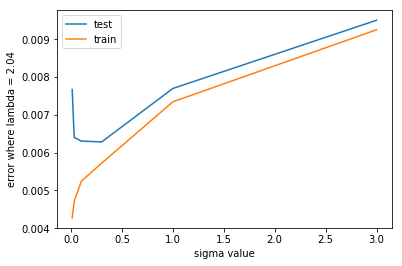

In [202]:
for i in range(5):
    line_1, = plt.plot(_sigma,testr_avg[i,:],label = 'test')
    line_2, = plt.plot(_sigma,trainr_avg[i,:],label = 'train')
    plt.legend(handles = [line_1, line_2])
    plt.ylabel("error where lambda = "+str(round(quantile2[i], 2)))
    plt.xlabel("sigma value")
    plt.show()